In [6]:
pip install --upgrade keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.callbacks import ReduceLROnPlateau
import cv2


In [2]:
label = ['PNEUMONIA', 'NORMAL']
img_size = 150

def get_training_data(data_dir):
    data = []
    for lb in label:
        path = os.path.join(data_dir, lb)
        class_num = label.index(lb)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append((resized_arr, class_num)) 
            except Exception as e:
                print(e)
    
    images = np.array([item[0] for item in data])
    labels = np.array([item[1] for item in data])
    
    return images, labels

In [3]:
test_data_dir = r'C:\Users\sidha\OneDrive - IIT Kanpur\Desktop\self_project\chest_xray_set\test'
train_data_dir = r'C:\Users\sidha\OneDrive - IIT Kanpur\Desktop\self_project\chest_xray_set\chest_xray\train'
val_data_dir = r'C:\Users\sidha\OneDrive - IIT Kanpur\Desktop\self_project\chest_xray_set\chest_xray\val'

train_data_img, train_lb = get_training_data(train_data_dir)
test_data_img, test_lb = get_training_data(test_data_dir)
val_data_img, val_lb = get_training_data(val_data_dir)

OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



In [4]:
x_train=[]
y_train=[]

x_val=[]
y_val=[]

x_test=[]
y_test=[]

for img in train_data_img:
    x_train.append(img)
for img in test_data_img:
    x_test.append(img)
for img in val_data_img:
    x_val.append(img)

for i in train_lb:
    y_train.append(i)
for i in test_lb:
    y_test.append(i) 
for i in val_lb:
    y_val.append(i)

In [5]:
x_train=np.array(x_train)/255
x_val=np.array(x_val)/255
x_test=np.array(x_test)/255

x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range = 30,
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip = True,  
        vertical_flip=False)  
datagen.fit(x_train)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Lambda, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow.keras.backend as K

input_shape = (150, 150, 1)

model = Sequential()

model.add(Input(shape=input_shape))
model.add(Lambda(lambda x: K.repeat_elements(x, 3, axis=-1)))


model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.4))  
                                                  
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.4))  

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=RMSprop(learning_rate=0.0001), 
              loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      33,558,528 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 65,058,625 (248.18 MB)

 Trainable params: 65,058,625 (248.18 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [10]:
history2 = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 9, validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/9


C:\Users\sidha\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 749s 5s/step - accuracy: 0.7283 - loss: 0.6249 - val_accuracy: 0.5000 - val_loss: 0.7915 - learning_rate: 1.0000e-04
Epoch 2/9
163/163 ━━━━━━━━━━━━━━━━━━━━ 753s 5s/step - accuracy: 0.7427 - loss: 0.5751 - val_accuracy: 0.5000 - val_loss: 0.7609 - learning_rate: 1.0000e-04
Epoch 3/9
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7302 - loss: 0.5317
Epoch 3: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
163/163 ━━━━━━━━━━━━━━━━━━━━ 1424s 9s/step - accuracy: 0.7303 - loss: 0.5315 - val_accuracy: 0.5000 - val_loss: 1.2736 - learning_rate: 1.0000e-04
Epoch 4/9
163/163 ━━━━━━━━━━━━━━━━━━━━ 708s 4s/step - accuracy: 0.8271 - loss: 0.3232 - val_accuracy: 0.6875 - val_loss: 0.7372 - learning_rate: 3.0000e-05
Epoch 5/9
163/163 ━━━━━━━━━━━━━━━━━━━━ 665s 4s/step - accuracy: 0.8664 - loss: 0.2854 - val_accuracy: 0.6875 - val_loss: 1.1235 - learning_rate: 3.0000e-05
Epoch 6/9
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8781 - loss: 0

In [11]:
print("Loss of the model is - " , model.evaluate(x_test,y_test))
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9389 - loss: 0.1824
Loss of the model is -  [0.3361169099807739, 0.8846153616905212]
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9389 - loss: 0.1824
Accuracy of the model is -  88.46153616905212 %


In [12]:
predictions = model.predict(x_test)
predicted_classes = (predictions > 0.5).astype("int32")

20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step


In [13]:
print(type(y_test), y_test.dtype)
print(type(predictions), predictions.dtype)
predictions = (predictions > 0.5).astype(int)
print(type(predictions), predictions.dtype)

<class 'numpy.ndarray'> int32
<class 'numpy.ndarray'> float32
<class 'numpy.ndarray'> int32


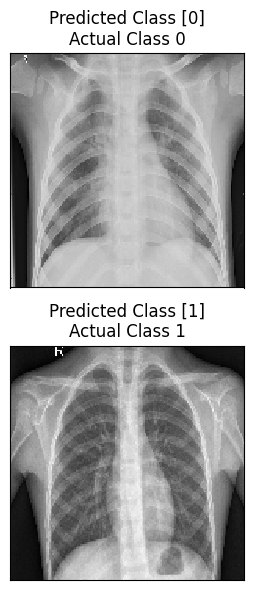

In [39]:
import random

correct_indices = np.nonzero(predictions == y_test)[0]
sample_indices = random.sample(list(correct_indices), min(2, len(correct_indices)))

plt.figure(figsize=(8, 6))  
for i, idx in enumerate(sample_indices):
    plt.subplot(2, 1, i + 1)
    plt.imshow(x_test[idx].reshape(150, 150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {}\nActual Class {}".format(predictions[idx], y_test[idx]))
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()